# Van der Pol

The van der Pol problem is a common stiff differential equation.

In [1]:
"""Benchmark all solvers on the Pleiades problem."""

import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax.config import config

from probdiffeq.util.doc_util import notebook

config.update("jax_platform_name", "cpu")

In [2]:
def load_results():
    """Load the results from a file."""
    return jnp.load("./results.npy", allow_pickle=True)[()]


def choose_style(label):
    """Choose a plotting style for a given algorithm."""
    if "probdiffeq" in label.lower():
        return {"color": "C0", "linestyle": "solid"}
    if "numba" in label.lower():
        return {"color": "C4", "linestyle": "dashed"}
    if "scipy" in label.lower():
        return {"color": "C2", "linestyle": "dashed"}
    if "diffrax" in label.lower():
        return {"color": "C3", "linestyle": "dotted"}
    msg = f"Label {label} unknown."
    raise ValueError(msg)


def plot_results(axis, results):
    """Plot the results."""
    for label, wp in results.items():
        style = choose_style(label)

        precision = wp["precision"]
        work_mean, work_std = (wp["work_mean"], wp["work_std"])
        axis.loglog(precision, work_mean, label=label, **style)

        range_lower, range_upper = work_mean - work_std, work_mean + work_std
        axis.fill_between(precision, range_lower, range_upper, alpha=0.3, **style)

    axis.set_xlabel("Precision [absolute RMSE]")
    axis.set_ylabel("Work [wall time, s]")
    axis.grid()
    return axis

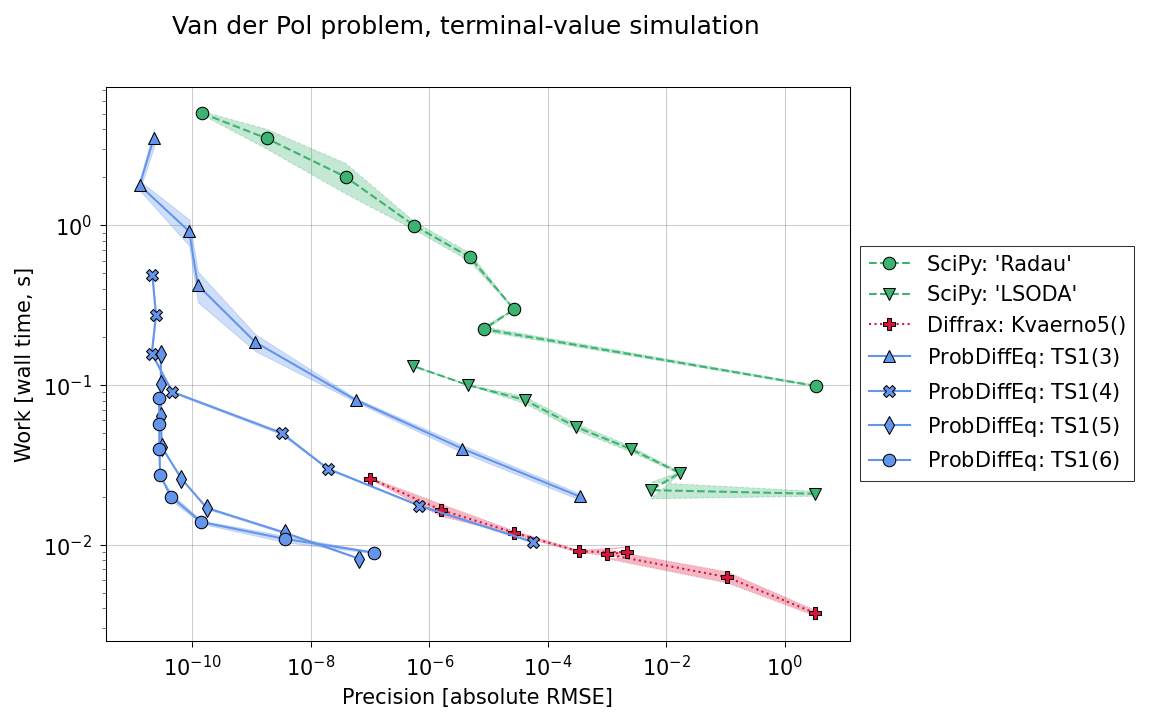

In [3]:
plt.rcParams.update(notebook.plot_config())

fig, axis = plt.subplots(dpi=150)
fig.suptitle("Stiff Van-der-Pol problem ($10^5$)")

results = load_results()
axis = plot_results(axis, results)
axis.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()